# <center> Imágenes y Machine Learning en Python 

# Aprendizaje Profundo

Una vez explicados los contenidos teóricos, empezaremos con el práctico de Aprendizaje Profundo. Para ello, trabajaremos con las librerías Keras y Tensorflow que permiten programar la arquitectura de una red de manera simple.

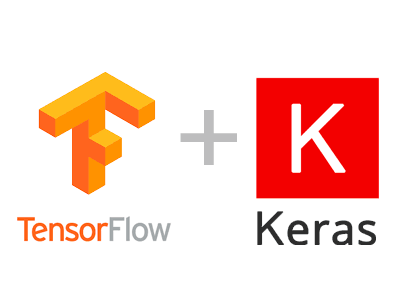

Documentación de las librerías:

* https://www.tensorflow.org/?hl=es-419

* https://keras.io/

De Keras importamos el módulo "layers" o capas con la que podremos definir las capas en la arquitectura de nuestra primera red.

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np

## Carga de Datos

Keras posee muchos set de datos para poder trabajar por primera vez con redes neuronales. Estos datos ya se encuentran "limpios" y bien balanceados.

Por lo tanto, importamos el dataset de imágenes de dígitos numéricos del 0 al 9 con la siguente línea de código:

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Este dataset posee el siguiente aspecto:

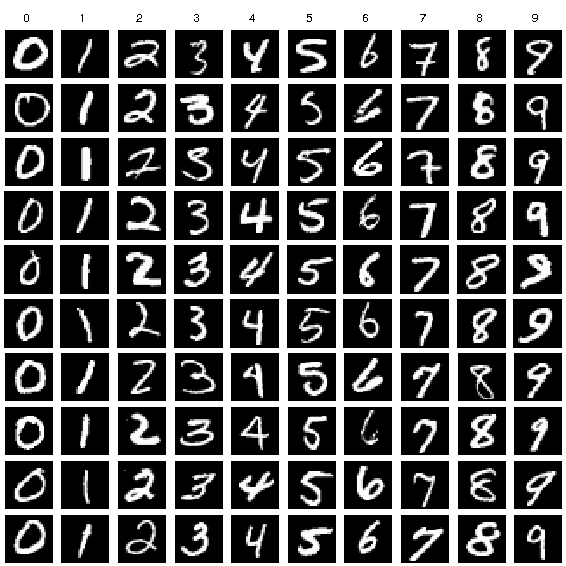

Las imágenes del dataset cargado son arreglos de numpy

In [4]:
type(X_train)

numpy.ndarray

El dataset posee un total de 60000 imágenes de entrenamiento y 10000 imágenes de prueba, todas con una dimensión de 28 x 28

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Ejercicio: elegir una imagen del data set y mostrarla

Estructura del dataset de entrenamiento

In [ ]:
unicos, cantidad = np.unique(y_train, return_counts = True)

print(f'El dataset posee imágenes de los siguentes números: {unicos}, y a cada número le corresponde la siguente cantidad: {cantidad}')

El dataset posee imágenes de los siguentes números: [0 1 2 3 4 5 6 7 8 9], y a cada número le corresponde la siguente cantidad: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


Ejercicio: imprimir la etiqueta de la imagen que mostró

Estructura del dataset de prueba

In [ ]:
unicos, cantidad = np.unique(y_test, return_counts = True)

print(f'El dataset posee imágenes de los siguentes números: {unicos}, y a cada número le corresponde la siguente cantidad {cantidad}')

El dataset posee imágenes de los siguentes números: [0 1 2 3 4 5 6 7 8 9], y a cada número le corresponde la siguente cantidad [ 980 1135 1032 1010  982  892  958 1028  974 1009]


Muestro 10 imágenes aleatorias del dataset con su etiqueta

La posición de la imagen a mostrar es la 59211
La etiqueta de la imagen es: 9


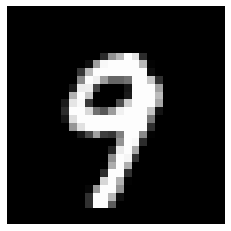

La posición de la imagen a mostrar es la 12063
La etiqueta de la imagen es: 3


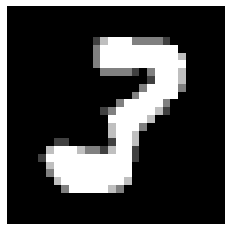

La posición de la imagen a mostrar es la 35434
La etiqueta de la imagen es: 3


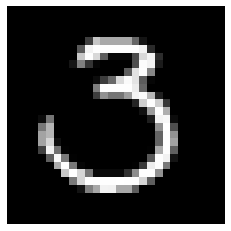

La posición de la imagen a mostrar es la 43449
La etiqueta de la imagen es: 2


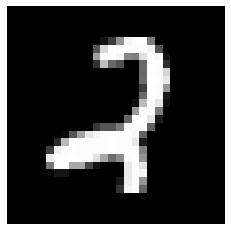

La posición de la imagen a mostrar es la 5963
La etiqueta de la imagen es: 1


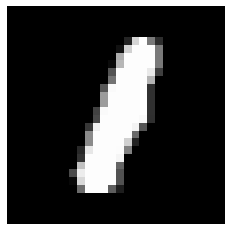

La posición de la imagen a mostrar es la 53441
La etiqueta de la imagen es: 7


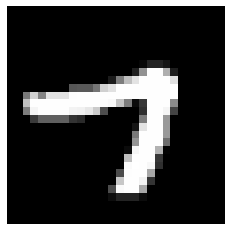

La posición de la imagen a mostrar es la 20966
La etiqueta de la imagen es: 8


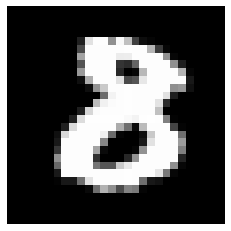

La posición de la imagen a mostrar es la 19567
La etiqueta de la imagen es: 9


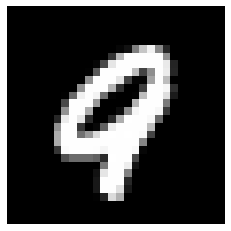

La posición de la imagen a mostrar es la 14877
La etiqueta de la imagen es: 0


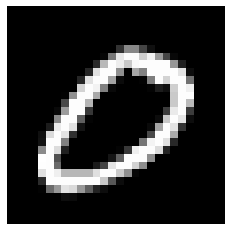

La posición de la imagen a mostrar es la 12478
La etiqueta de la imagen es: 7


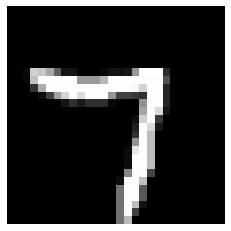

In [ ]:
for i in range(10):
    numero = np.random.randint(low = 0, high = 60000)
    print(f'La posición de la imagen a mostrar es la {numero}')
    print(f'La etiqueta de la imagen es: {y_train[numero]}')
    plt.imshow(X_train[numero, :, :], cmap = 'gray')
    plt.axis('off')
    plt.show()

## Procesamiento del Set de Datos

Importante: siepre primero estudiar, entender, analizar el set de datos a trabajar...

Continuamos con el procesamiento de datos. Debo convertir la imagen de 28 x 28 en un vector de 784 elementos.

In [ ]:
28 * 28

784

Para poder lograr esto, debemos usar la función reshape. Lo aplicamos tanto en los datos de entrenamiento como en los datos de prueba.

In [7]:
X_train = X_train.reshape(60000, 784)

In [8]:
X_test = X_test.reshape(10000, 784)

Una vez acondicionados los datos de entrenamiento, debo procesar las etiquetas transformándolas en lo que denominamos "Codificación One Hot".

Los números enteros son utilizados para categorías discretas como colores, clases de imágenes o lugares.

Sin embargo, la librería Keras trabaja con otro tipo de formato denominado "One - Hot" que representa a N cantidad de clases con un vector de N elementos donde el vector de cada clase posee un elemento 1 en una posición única y elemntos 0 en las otras posiciones.

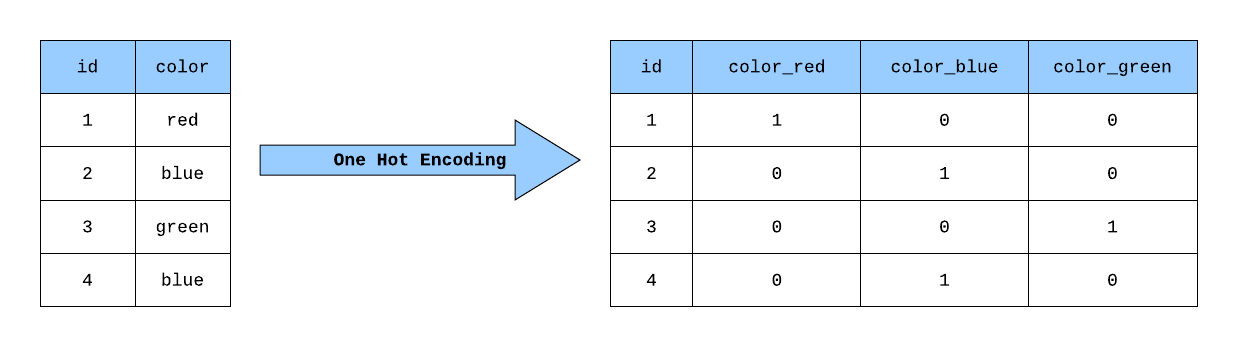

Codificación de clases con números enteros cargados del dataset.

In [6]:
y_train[0:7]

array([5, 0, 4, 1, 9, 2, 1], dtype=uint8)

Utilizamos la función "to_categorical" para poder transformar los números enteros a "One - Hot" tanto en las etiquetas de entrenamiento como en las etiquetas de prueba.

In [9]:
y_train = keras.utils.to_categorical(y_train)

In [10]:
y_test = keras.utils.to_categorical(y_test)

Muestro los primeros 7 elementos con la codificación "One - Hot"

In [ ]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## ¡Listo!

Ya con los datos pre-procesados, empezaremos con la construcción de la arquitectura de la red. Empezaremos con algo simple.

### Estructura de la Red Neuronal Totalmente conectada

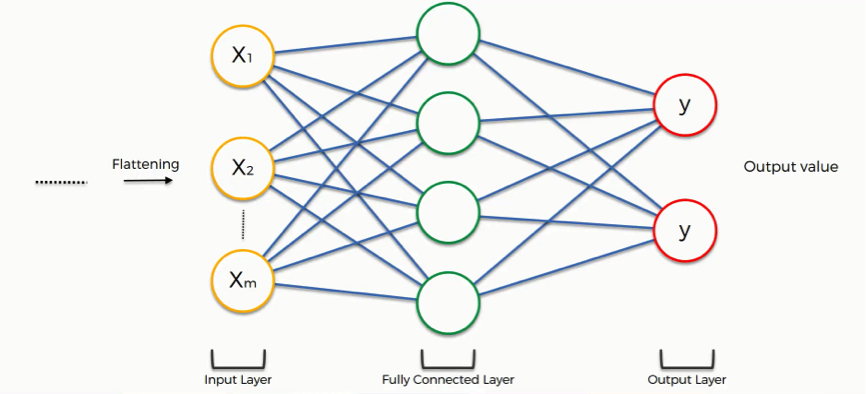

### Capa de Entrada

Primero, creamos la capa de entrada, recordando que debemos el módulo "layers" de Keras.

Para definir la capa de entrada, del módulo "layers" llamamos a la función Input para crear la capa de entrada que recibira a la imagen vectorizada. Debe tener un tamaño estándar para recibir el vector. Con el argumento shape definimos el tamaño, en este caso de (784,)

In [11]:
Imagen_de_entrada = layers.Input(shape = (784,))

### Capas Ocultas

Una vez que el vector haya ingresado a la capa de entrada. Debemos crear las capas ocultas. Usamos del módulo "layers" la función **Dense** para crear una red neuronal tradicional, o totalmente conectada, "fully connected".

Posee los siguentes argumentos a completar:

* units: Define la cantidad de neuronas que se encuentran en la capa.
* activation: Define la función de activación con la que trabajarán las neuronas de dicha capa.

Además, a esta función se le debe agregar otro argumento en paréntesis aparte al costado de la misma. Este argumento recibe como valor el vector de la capa de entrada, en este caso, el vector de la imagen.

Una forma generica de visualizarlo es:

Capa = layers.Dense(units = **Cantidad de neuronas**, activation = **Función de activación**)(**Vector de Entrada**)

Defino la primera capa oculta de neuronas, que contenga 64 neuronas, que trabajen con la función de activación "RELU" y que reciban como entrada al vector de la imagen. A esta capa la llamo "Capa 1".

In [12]:
Capa1 = layers.Dense(units = 64, activation = 'relu')(Imagen_de_entrada)

Una vez que definida la primera capa oculta, defino la segunda capa, que contenga 128 neuronas y que también trabaje con la función de activación Relu. Además, defino como argumento de entrada a la primera capa oculta, la "Capa 1". A esta capa la llamo "Capa 2".

In [13]:
Capa2 = layers.Dense(units = 128, activation = 'relu')(Capa1)

Por último, defino la ultima capa, la capa de salida. Esta capa debe tener tantas unidades como cantidad de clases se quieran predecir. En este caso, se requerirán 10 neuronas al haber 10 clases de imágenes. Recibe como argumento de entrada a la capa "Capa 2". Al ser una red neuronal que resuelve un problema de clasificación, se debe usar como función de activación a la función "softmax" que permite devolver como salida un vector de N elementos normalizado, es decir, que la sumatoria de los elementos sea igual a $1$. A este vector de salida también se lo conoce como vector de prediciones probables en donde el elemento más grande de ese vector corresponde a la predicción que hace el modelo sobre la imagen de entrada.

In [14]:
Salida = layers.Dense(units = 10, activation = 'softmax')(Capa2)

'softmax': Exponencial normalizada (ver: https://es.wikipedia.org/wiki/Funci%C3%B3n_SoftMax )

## Instancia de Clase de Modelo de Keras

Una vez definidas las capas se define la red neuronal mencinando  ual es su entrada/input y su Salida/output. Para ello, hay que utilizar la clase Models de Keras. Esta clase posee 2 argumentos:

* inputs: Capa que se utilizará como entrada.

* outputs: Capa que se utilizará como salida para predecir la etiqueta.

Cuando llamemos a esta clase y le asignemos los valores a sus argumentos almacenamos el modelo en una variable con el nombre **"Red_Neuronal"**. Creamos una instancia de clase.

In [15]:
Red_Neuronal = keras.Model(inputs = Imagen_de_entrada, outputs = Salida)

## Compilación de Modelo

* Función de Coste.

* Optimizador.

* Métricas de evaluación.

Luego de definir la entrada y salida, debemos definir 3 cosas más:

* La función de coste: En este caso al ser una red de clasificación de clases múltiples, utilizaremos "categorical_crossentropy".

* El optimizador: En este caso utilizaremos el optimizador "adam".

* Métrica de evaluación, en este caso, utilizaremos la "precisión" / "accuracy".

Para poder hacerlo, debemos usar el método de la clase "Models.compile()", en este caso al haber llamado a la instancia de la clase "Red_Neuronal", para llamar a este método debemos escribir "Red_Neuronal.compile()"

In [25]:
Red_Neuronal.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

https://keras.io/api/losses/

https://keras.io/api/optimizers/


Por último, debemos usar otro método de clase para **entrenar/ajustar el modelo a los datos** definiendole lo siguiente:

* Matriz con Datos de Entrada: En este caso X_train.

* Etiquetas de datos de Entrada: En este caso y_train.

* Cantidad de épocas: Cantidad de veces que pasarán los datos por la red neuronal en el entrenamiento. Elegimos arbitrariamente 10 épocas.

* Tamaño del lote: Cantidad de datos que pasarán por la red hasta obtener una respuesta de aprendizaje mediante backpropagation para poder reajustar los parámetros. Elegimos arbitrariamente 32 datos por lote.

* Datos de Validación: En este caso elegimos a X_test y y_test.

Usamos el método de clase "fit" para poder realizar esto, debemos escribir "Red_Neuronal.fit()". Con la ejecución de esta celda, se inicia el entrenamiento de la red.

In [26]:
Historia = Red_Neuronal.fit(x = X_train, y = y_train, epochs = 10, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3307 - accuracy: 0.8212 - val_loss: 0.4976 - val_accuracy: 0.8844
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4103 - accuracy: 0.8995 - val_loss: 0.4326 - val_accuracy: 0.9049
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3770 - accuracy: 0.9107 - val_loss: 0.4142 - val_accuracy: 0.9111
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3320 - accuracy: 0.9204 - val_loss: 0.3639 - val_accuracy: 0.9244
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2969 - accuracy: 0.9287 - val_loss: 0.3010 - val_accuracy: 0.9263
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2469 - accuracy: 0.9366 - val_loss: 0.2505 - val_accuracy: 0.9401
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2180 - accuracy: 0.9426 - val_loss: 0.2246 - val_accuracy:

## Ilustración de Métricas de la Red

In [29]:
print(Historia.history)

{'loss': [1.3307353258132935, 0.4103323519229889, 0.3770287334918976, 0.3320041298866272, 0.296865314245224, 0.246896430850029, 0.21802262961864471, 0.18888412415981293, 0.17189356684684753, 0.16012056171894073], 'accuracy': [0.8212000131607056, 0.8995333313941956, 0.9106833338737488, 0.9204333424568176, 0.9287499785423279, 0.9365500211715698, 0.942550003528595, 0.9492999911308289, 0.9545666575431824, 0.9567499756813049], 'val_loss': [0.4975889027118683, 0.43256571888923645, 0.4141506254673004, 0.36394110321998596, 0.3010396361351013, 0.2505491375923157, 0.2246193140745163, 0.21428793668746948, 0.24799667298793793, 0.20802529156208038], 'val_accuracy': [0.8844000101089478, 0.9049000144004822, 0.9110999703407288, 0.9243999719619751, 0.9262999892234802, 0.9401000142097473, 0.9431999921798706, 0.949400007724762, 0.9380999803543091, 0.9502999782562256]}


Puedo almacenar los valores obtenidos durante el entrenamiento de la red y graficarlos.

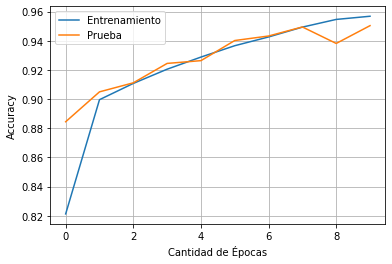

In [27]:
plt.plot(Historia.history['accuracy'], label = 'Entrenamiento')
plt.plot(Historia.history['val_accuracy'], label = 'Prueba')
plt.grid()
plt.xlabel('Número de Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Por último, puedo utilizar el método de clase "summary" para poder ver la arquitectura resumida de la red en una tabla

In [30]:
Red_Neuronal.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


Ahora podemos obtener las predicciones de la red del set de datos utilizando el método de clase "predict".

In [18]:
Predicciones_MNIST = Red_Neuronal.predict(X_train)

Imprimo los vectores de predicción para visualizarlos y sacar conclusiones.

In [19]:
np.round(Predicciones_MNIST[0:15], decimals = 3)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
y_train.shape

(60000, 10)

In [21]:
Predicciones_MNIST.shape

(60000, 10)

In [22]:
for i in range(15):
    print(f'Etiqueta: {y_train[i]}')
    print(f'Predicción: {np.round(Predicciones_MNIST[i], decimals = 3)}')

Etiqueta: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Predicción: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Etiqueta: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicción: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Etiqueta: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Predicción: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Etiqueta: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicción: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Etiqueta: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicción: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Etiqueta: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Predicción: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Etiqueta: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicción: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Etiqueta: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicción: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Etiqueta: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicción: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Etiqueta: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Predicción: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Etiqueta: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicción: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Etiqueta: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Predicción: 

### Ejercicio: 

Construir una red neuronal reciba como entrada las imágenes del dataset MNIST y que tenga 2 capas ocultas, la primera con 250 neuronas (con funciones de activación sigmoid) y la segunda con 125 neuronas (con funciones de activación relu). La red debe ser entrenada en 15 épocas y con lotes de 64 datos. Grafique la precisión de los datos de entrenamiento y los datos de prueba. Ilustrar la tabla que resuma la arquitectura del modelo y averiguar cuántos hiperparámetros tiene el mismo.

In [23]:
Imagen_de_Entrada = layers.Input(shape = '''COMPLETAR''')

Capa1 = layers.Dense(units = '''COMPLETAR''', activation = '''COMPLETAR''')('''COMPLETAR''')

Capa2 = '''COMPLETAR'''

Salida = layers.Dense(units = '''COMPLETAR''', activation = '''COMPLETAR''')('''COMPLETAR''')

Red_Neuronal2 = keras.Model(inputs = '''COMPLETAR''', outputs = '''COMPLETAR''')

Red_Neuronal2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Red_Neuronal2.fit(x = X_train, y = y_train, epochs = '''COMPLETAR''', 
                  batch_size = '''COMPLETAR''', validation_data = (X_test, y_test))

TypeError: ignored